<a href="https://colab.research.google.com/github/mannenamratha/Spam_Email_detect/blob/main/Spam_Email_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# Importing necessary libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')

# Importing libraries necessary for Model Building and Training
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
file_path1 = '/content/drive/My Drive/Datasets/spam.csv'
print(file_path1)

/content/drive/My Drive/Datasets/spam.csv


In [11]:
data = pd.read_csv('/content/drive/My Drive/Datasets/spam.csv', encoding='latin-1') #Try reading the file with 'latin-1' encoding.
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
data.shape

(5572, 5)

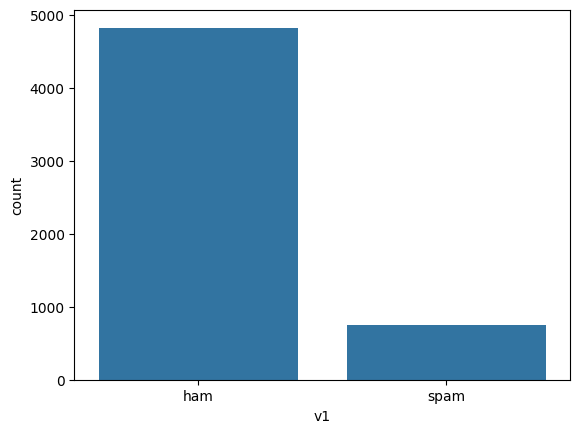

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'v1' is the correct column representing spam/ham
sns.countplot(x='v1', data=data)
plt.show()

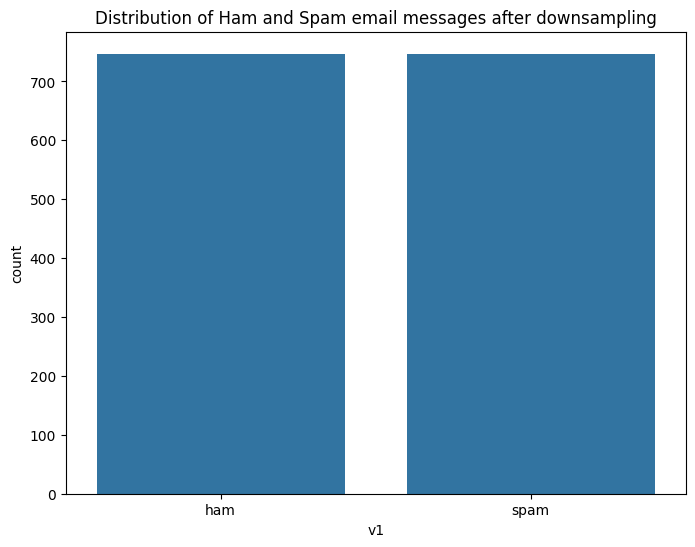

In [17]:
# Downsampling to balance the dataset
ham_msg = data[data.v1 == 'ham']
spam_msg = data[data.v1 == 'spam']
ham_msg = ham_msg.sample(n=len(spam_msg),
                         random_state=42)

# Plotting the counts of down sampled dataset
balanced_data = pd.concat([ham_msg, spam_msg]).reset_index(drop=True) # Use pd.concat instead of append
plt.figure(figsize=(8, 6))
sns.countplot(data = balanced_data, x='v1')
plt.title('Distribution of Ham and Spam email messages after downsampling')
plt.show()

In [19]:
balanced_data['v2'] = balanced_data['v2'].str.replace('Subject', '') # Change the column accessed from 'text' to 'v2'
balanced_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"I am late,so call you tomorrow morning.take ca...",NaN,NaN,NaN
1,ham,U r too much close to my heart. If u go away i...,NaN,NaN,NaN
2,ham,Wait &lt;#&gt; min..,NaN,NaN,NaN
3,ham,Can you call me plz. Your number shows out of ...,NaN,NaN,NaN
4,ham,MAYBE IF YOU WOKE UP BEFORE FUCKING 3 THIS WOU...,NaN,NaN,NaN


In [21]:
import string

punctuations_list = string.punctuation
def remove_punctuations(text):
    temp = str.maketrans('', '', punctuations_list)
    return text.translate(temp)

# Assuming the column you want to work with is named 'v2'
balanced_data['v2']= balanced_data['v2'].apply(lambda x: remove_punctuations(x)) # Changed 'text' to v2
balanced_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,I am lateso call you tomorrow morningtake care...,NaN,NaN,NaN
1,ham,U r too much close to my heart If u go away i ...,NaN,NaN,NaN
2,ham,Wait ltgt min,NaN,NaN,NaN
3,ham,Can you call me plz Your number shows out of c...,NaN,NaN,NaN
4,ham,MAYBE IF YOU WOKE UP BEFORE FUCKING 3 THIS WOU...,NaN,NaN,NaN


In [23]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')

    imp_words = []

    # Storing the important words
    for word in str(text).split():
        word = word.lower()

        if word not in stop_words:
            imp_words.append(word)

    output = " ".join(imp_words)

    return output


balanced_data['v2'] = balanced_data['v2'].apply(lambda text: remove_stopwords(text)) # Changed 'text' to 'v2'
balanced_data.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,lateso call tomorrow morningtake care sweet dr...,NaN,NaN,NaN
1,ham,u r much close heart u go away shattered plz stay,NaN,NaN,NaN
2,ham,wait ltgt min,NaN,NaN,NaN
3,ham,call plz number shows coveragd area urgnt call...,NaN,NaN,NaN
4,ham,maybe woke fucking 3 wouldnt problem,NaN,NaN,NaN


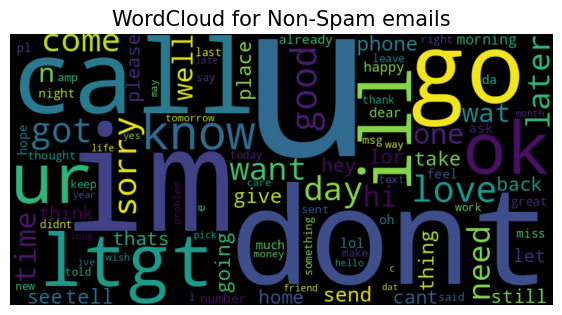

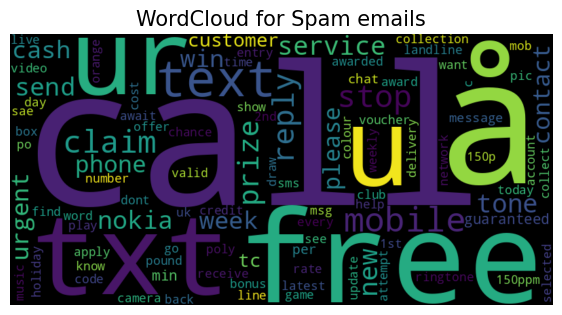

In [25]:
def plot_word_cloud(data, typ):
    email_corpus = " ".join(data['v2']) # Changed 'text' to 'v2'

    plt.figure(figsize=(7, 7))

    wc = WordCloud(background_color='black',
                max_words=100,
                width=800,
                height=400,
                collocations=False).generate(email_corpus)

    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'WordCloud for {typ} emails', fontsize=15)
    plt.axis('off')
    plt.show()

plot_word_cloud(balanced_data[balanced_data['v1'] == 'ham'], typ='Non-Spam') # Changed 'spam' to 'v1' and 0 to 'ham'
plot_word_cloud(balanced_data[balanced_data['v1'] == 'spam'], typ='Spam') # Changed 'spam' to 'v1' and 1 to 'spam'


In [27]:
#train test split
#train test split
train_X, test_X, train_Y, test_Y = train_test_split(balanced_data['v2'], # Changed 'text' to 'v2'
                                                    balanced_data['v1'], # Changed 'spam' to 'v1'
                                                    test_size = 0.2,
                                                    random_state = 42)


In [28]:
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_X)

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(train_X)
test_sequences = tokenizer.texts_to_sequences(test_X)

# Pad sequences to have the same length
max_len = 100 # maximum sequence length
train_sequences = pad_sequences(train_sequences,
								maxlen=max_len,
								padding='post',
								truncating='post')
test_sequences = pad_sequences(test_sequences,
							maxlen=max_len,
							padding='post',
							truncating='post')


In [29]:
# Build the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1,
									output_dim=32,
									input_length=max_len))
model.add(tf.keras.layers.LSTM(16))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Print the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
			metrics = ['accuracy'],
			optimizer = 'adam')


In [31]:
es = EarlyStopping(patience=3,
				monitor = 'val_accuracy',
				restore_best_weights = True)

lr = ReduceLROnPlateau(patience = 2,
					monitor = 'val_loss',
					factor = 0.5,
					verbose = 0)


In [33]:
# Train the model
# Convert string labels to numerical values (0 and 1)
train_Y = np.where(train_Y == 'spam', 1, 0)
test_Y = np.where(test_Y == 'spam', 1, 0)

# Train the model
history = model.fit(train_sequences, train_Y,
					validation_data=(test_sequences, test_Y),
					epochs=20,
					batch_size=32,
					callbacks = [lr, es]
				)



Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.4972 - loss: 0.6941 - val_accuracy: 0.4849 - val_loss: 0.6934 - learning_rate: 0.0010
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.5019 - loss: 0.6932 - val_accuracy: 0.4849 - val_loss: 0.6935 - learning_rate: 0.0010
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.4991 - loss: 0.6934 - val_accuracy: 0.4849 - val_loss: 0.6932 - learning_rate: 0.0010
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5038 - loss: 0.6932 - val_accuracy: 0.4849 - val_loss: 0.6935 - learning_rate: 0.0010


In [34]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_sequences, test_Y)
print('Test Loss :',test_loss)
print('Test Accuracy :',test_accuracy)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5028 - loss: 0.6931
Test Loss : 0.6934270858764648
Test Accuracy : 0.48494982719421387


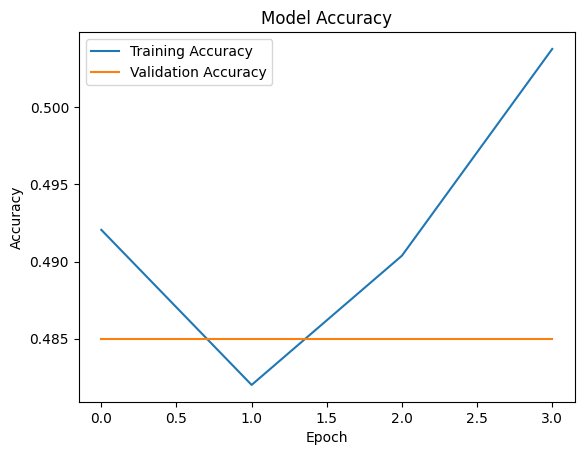

In [35]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
